# Intro to Supervised Machine Learning

## Classification

#### Loading and preparing the data

In [1]:
from sklearn.datasets import load_iris, fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for anomalies

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Quick EDA

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


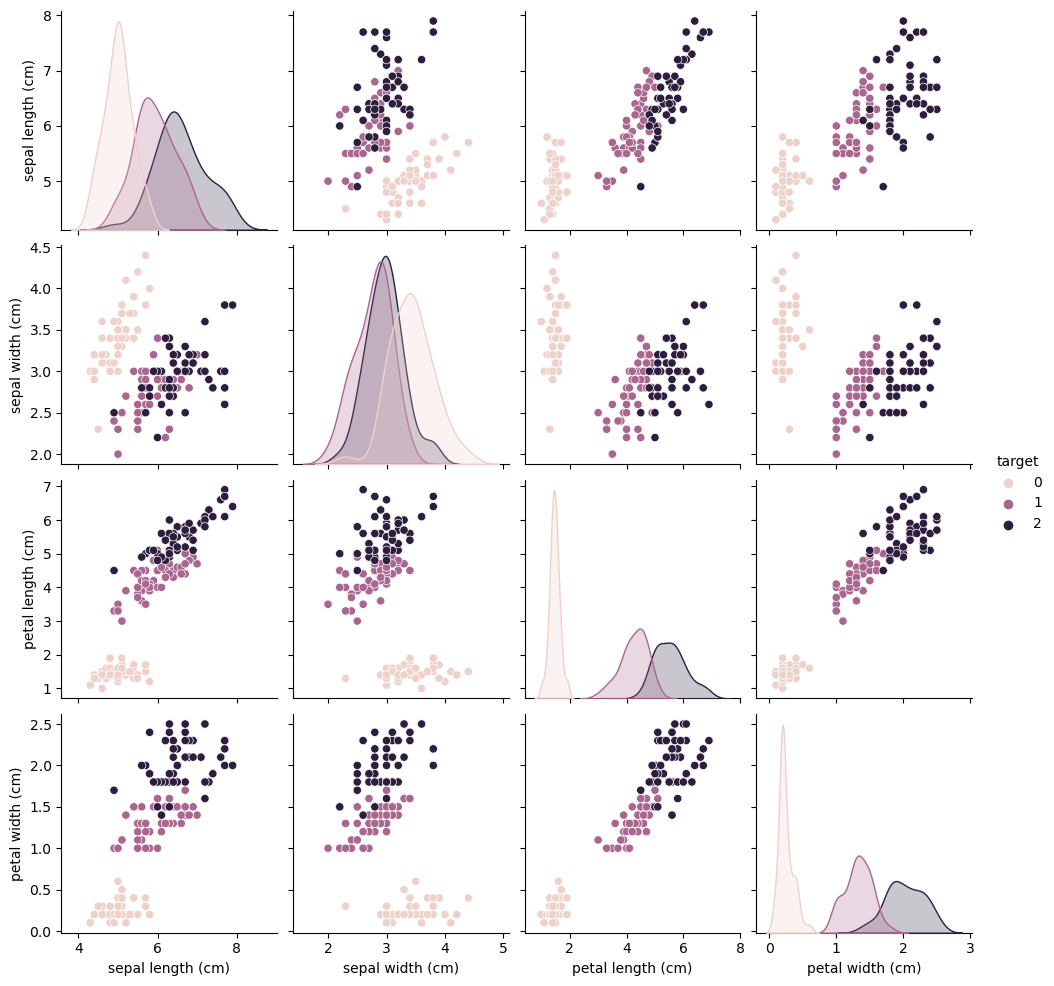

In [6]:
sns.pairplot(df, hue = "target")
plt.show()

#### Train Test Split

First we need to distinguish from features and target

In [7]:
features = df.drop(columns = "target")
target = df["target"]

display(features)
display(target)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.20, random_state=0)

#randome_state = 0 is a fixed order of rows being selected to training and testing
# X -> features, y -> target
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [9]:
display(X_test.head())
display(y_train.head())
display(y_test.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


137    2
84     1
27     0
127    2
132    2
Name: target, dtype: int64

114    2
62     1
33     0
107    2
7      0
Name: target, dtype: int64

For this dataset we will use KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Creating an instance of the model, for now, we will use n_neighbors=3 (we will see how to optimize this hyperparameter later)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

Training the model

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now, our model is already trained, we can make predictions for new data points

In [13]:
### sepal_length sepal_width, petal_length, petal_width
import numpy as np

new_plant = np.array([[2, 1.5, 4, 2.5]])
new_plant

array([[2. , 1.5, 4. , 2.5]])

In [14]:
knn.predict(new_plant)

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

Let's compare with the true labels

In [15]:
X_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [16]:
knn.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [17]:
y_test.values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

It seems that our model was able to correctly predict the great majority of data points. To be precise, 29 out of 30 data points were correctly labeled.

In order to evaluate our model, we will use the method "score" that will give us accuracy.

In [18]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [19]:
29/30

0.9666666666666667

In [21]:
knn.score(X_test, y_test)

0.9666666666666667

### Save your model

In [22]:
import pickle
#how to save
pickle.dump(knn, open("knn.pkl", "wb"))

In [23]:
## how to  liad
imported_model=pickle.load(open("knn.pkl", "rb"))

In [24]:
type(imported_model)

sklearn.neighbors._classification.KNeighborsClassifier

In [25]:
imported_model.predict(new_plant)

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## Regression

#### Loading and preparing the data

In [26]:
california = fetch_california_housing()

print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [27]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]
df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Checking for anomalies

In [28]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [29]:
df_cali.duplicated().sum()

0

#### Quick EDA

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x800 with 0 Axes>

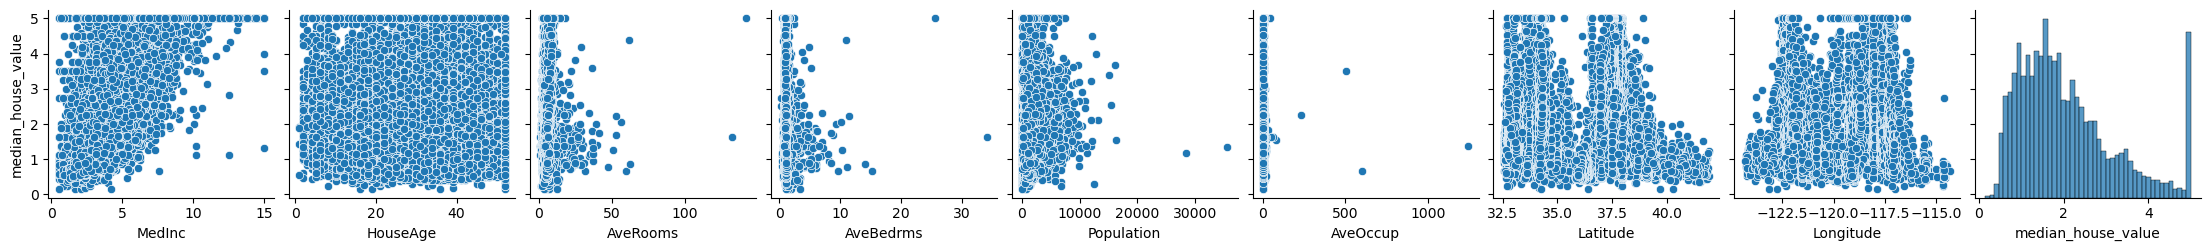

MEDINC
Pearson corr 0.6880752079585475
Spearman corr 0.6767781095942506
HOUSEAGE
Pearson corr 0.10562341249320989
Spearman corr 0.07485485302251019
AVEROOMS
Pearson corr 0.15194828974145774
Spearman corr 0.26336668772954447
AVEBEDRMS
Pearson corr -0.04670051296948685
Spearman corr -0.12518706503579644
POPULATION
Pearson corr -0.024649678888894886
Spearman corr 0.0038387551282557182
AVEOCCUP
Pearson corr -0.023737412956134345
Spearman corr -0.2565937646638933
LATITUDE
Pearson corr -0.1441602768746593
Spearman corr -0.1657388374452999
LONGITUDE
Pearson corr -0.045966615117978546
Spearman corr -0.06966666665067331
MEDIAN_HOUSE_VALUE
Pearson corr 1.0
Spearman corr 1.0


In [33]:
plt.figure(figsize = (25,8))
sns.pairplot(df_cali, y_vars=["median_house_value"], kind= "scatter")
plt.show()

for col in df_cali.columns:
    print(col.upper())
    print("Pearson corr", df_cali["median_house_value"].corr(df_cali[col], method = "pearson"))
    print("Spearman corr", df_cali["median_house_value"].corr(df_cali[col], method = "spearman"))

#### Train Test Split

First we need to distinguish from features and target

In [34]:
features = df_cali.drop(columns = ["median_house_value"])
target = df_cali["median_house_value"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [37]:
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
Name: median_house_value, dtype: float64

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
Name: median_house_value, dtype: float64

Now, we will use KNN Regressor, we will use hyperparameter n_neighbors = 10.

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=10)

knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [42]:
house_block = np.array([[6, 3, 8, 2.5, 400, 4, 33.83, -117.55]])

knn_reg.predict(house_block)

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.764])

We are going to evaluate our model performance with R-Squared

In [43]:
from sklearn.metrics import r2_score
pred = knn_reg.predict(X_test)
r2_score(y_test, pred)


0.16103204926382153

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred, squared=False)


1.0459332542028779

In [45]:
df_compare = pd.DataFrame(y_test.values, columns = ["true_label"])
df_compare["my_pred"] = pred
df_compare

,true_label,my_pred
0,1.369,1.745800
1,2.413,2.021200
2,2.007,2.468701
3,0.725,2.690900
4,4.600,1.677200
...,...,...
4123,1.695,1.459900
4124,2.046,2.089301
4125,1.286,2.290000
4126,2.595,2.195100


In [48]:
df_compare['diff']= (df_compare.true_label - df_compare.my_pred)**2
df_compare

,true_label,my_pred,diff
0,1.369,1.745800,0.141978
1,2.413,2.021200,0.153507
2,2.007,2.468701,0.213168
3,0.725,2.690900,3.864763
4,4.600,1.677200,8.542760
...,...,...,...
4123,1.695,1.459900,0.055272
4124,2.046,2.089301,0.001875
4125,1.286,2.290000,1.008016
4126,2.595,2.195100,0.159920


In [47]:
np.sqrt(df_compare['diff'].sum()/4128)  # mean squared error manually

1.0459332542028779

In [ ]:
## we have pretty bad model
## R2_score is fairly low (0.16)
## and typically error of our model is 105k